## Statistical Analysis 

## What variables are statistically significant

In [ ]:
### Is 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# to change release date into a date type
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [5]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [6]:
# integer conversion successful
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [7]:
budgets['production_budget'].describe()

# average production budget is $31,587,757.10 with a standard deviation of $41,812,076.83
# data is very spread out

count        5782.00
mean     31587757.10
std      41812076.83
min          1100.00
25%       5000000.00
50%      17000000.00
75%      40000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [8]:
budgets['domestic_gross'].describe()

# average domestic gross income is $41,873,326.87

count        5782.00
mean     41873326.87
std      68240597.36
min             0.00
25%       1429534.50
50%      17225945.00
75%      52348661.50
max     936662225.00
Name: domestic_gross, dtype: float64

In [10]:
# filter out movies that have made over this threshold.
filtered_budgets = budgets[budgets['domestic_gross'] > 41873326.87]
filtered_budgets.head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923


In [15]:
filtered_budgets['production_budget'].describe()

count        1760.00
mean     65486782.37
std      56240274.83
min         25000.00
25%      25000000.00
50%      50000000.00
75%      85250000.00
max     425000000.00
Name: production_budget, dtype: float64

In [ ]:
# Let's say that Computing Vision wants to make the average ($41,873,326.87) amount fot gross domestic income on
#     their first film.
# Computing Vision believes a modest budget of $20,000,000 will be enough to reach their goal. Is this true?

# Ho: A production budget of $20,000,000 is not enough to make the average amount of gross income. (mu <= x-bar)
# Ha: A production budget of $20,000,000 is enough to make the average amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [53]:
# computing z-statistic
import scipy.stats as stats
from math import sqrt
x_bar = 20000000 # sample mean 
n = 1760 # number of movies
sigma = 56240274.83 # sd of population
mu = 65486782.37 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

-33.93080134736323

In [54]:
# computing p-value
p = stats.norm.cdf(z)

In [55]:
pval = 1 - p
pval

1.0

In [ ]:
# with a p-value of 1, we can confidently reject the null hypothesis and conclude that a $20,000,000 budget is not enough
#     to make domestic gross income of $41,873,326.87.

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

In [38]:
# What production budget will allow Computing Vision to make at least $41,873,326.87 in gross domestic income?
# Would a $40,000,000 budget allow for this to happen?

# Ho: A production budget of $40,000,000 is not enough to make the average amount of gross income. (mu <= x-bar)
# Ha: A production budget of $40,000,000 is enough to make the average amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [56]:
x_bar1 = 40000000 # sample mean 
n1 = 1760 # number of movies
sigma1 = 56240274.83 # sd of population
mu1 = 65486782.37 # Population mean 

z1 = (x_bar1 - mu1)/(sigma1/sqrt(n1))
z1

-19.011829470494803

In [57]:
# computing p-value
p1 = stats.norm.cdf(z1)

In [58]:
pval1 = 1 - p1
pval1

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

1.0

In [ ]:
# doubling their initial modest budget does not get them to their goal; they will likely need to spend more
# try $68,000,000

# Ho: A production budget of $68,000,000 is not enough to make the average amount of gross income. (mu <= x-bar)
# Ha: A production budget of $68,000,000 is enough to make the average amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)b

# Mathis Visualization

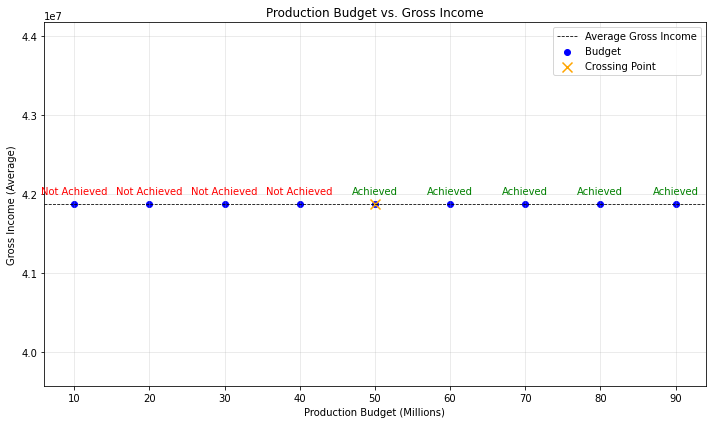

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
population_mean = 41873326.87  # Average gross income of first films
budgets = np.linspace(10000000, 90000000, 9)  # Budget inputs ranging from 10 million to 90 million

# Lists to store results for labeling
labels = []
crossing_budget = None  # To store the budget where it crosses from not achieved to achieved

# Check if each budget achieved the average gross income
for budget in budgets:
    if budget >= population_mean:
        labels.append('Achieved')
        if crossing_budget is None:
            crossing_budget = budget
    else:
        labels.append('Not Achieved')

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(budgets / 1000000, [population_mean] * len(budgets), color='blue', marker='o', label='Budget')
for i, label in enumerate(labels):
    color = 'green' if label == 'Achieved' else 'red'
    plt.annotate(label, (budgets[i] / 1000000, population_mean), color=color, textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
if crossing_budget is not None:
    plt.scatter(crossing_budget / 1000000, population_mean, color='orange', marker='x', s=100, label='Crossing Point')
plt.axhline(y=population_mean, color='black', linestyle='--', linewidth=0.8, label='Average Gross Income')
plt.xlabel('Production Budget (Millions)')
plt.ylabel('Gross Income (Average)')
plt.title('Production Budget vs. Gross Income')
plt.xticks(np.arange(10, 91, step=10))  # Adjust tick labels to show values in millions
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
x_bar2 = 68000000 # sample mean 
n2 = 1760 # number of movies
sigma2 = 56240274.83 # sd of population
mu2 = 65486782.37 # Population bmean 

z2 = (x_bar2 - mu2)/(sigma2/sqrt(n2))
z2

1.8747311571209981

In [69]:
# computing p-value
p2 = stats.norm.cdf(z2)

In [70]:
pval2 = 1 - p2
pval2

# p < a; rejct the null hypothesis and conclude with 95% confidence that this budget wull help them reach their goal domesting gross income.

0.030414859127154692